### Analysis of data from Tombak et al., 2024 (https://doi.org/10.1038/s41467-024-45739-5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

The original R code appears to contain an error.

![title](../img/code_error.png)

Where the critical values should be calculated with a t distribution with $df = n_M + n_F - 2$, they are instead calculated with $df = n_M + n_F - 1$.

### Q1: How does this affect the results?

In [2]:
data_df = pd.read_csv('../data/Tombak_etal_SSDinMammals_FullDataSet.csv', encoding='latin')

In [3]:
data_df['diffMF'] = data_df['massM'] - data_df['massF']

In [4]:
data_df['pooledVar'] = ((data_df['n_M'] - 1)*(data_df['SDmassM']**2) + (data_df['n_F'] - 1)*(data_df['SDmassF']**2))/(data_df['n_M'] + data_df['n_F'] - 2)

Using $df = n_M + n_F - 1$

In [5]:
data_df['massdiffmoe'] = scipy.stats.t.ppf(q=0.975, df=data_df['n_M'] + data_df['n_F'] - 1)*np.sqrt((data_df['pooledVar']/data_df['n_M']) + (data_df['pooledVar']/data_df['n_F']))

In [6]:
data_df['95CI_width'] = data_df['massdiffmoe']*2

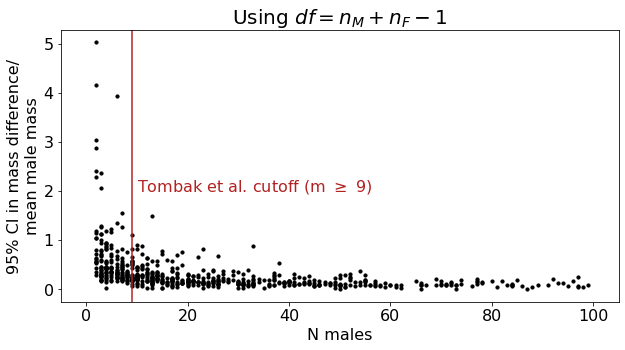

In [7]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()

data_df_slice = data_df[data_df['n_M'] <= 100]
ax.scatter(data_df_slice['n_M'], data_df_slice['95CI_width']/data_df_slice['massM'], s=10, color='k')
ax.set_xlim([-5,105])
ax.axvline(9, color='firebrick')
ax.text(s='Tombak et al. cutoff (m $\geq$ 9)', x = 10, y= 2, color='firebrick', fontsize=16)
ax.set_ylabel('95% CI in mass difference/\nmean male mass', fontsize=16)
ax.set_xlabel('N males', fontsize=16)
ax.tick_params(labelsize=16)
ax.set_title('Using $df = n_M + n_F - 1$', fontsize=20)
fig.savefig('../img/nm_plus_nf_minus_1.png', dpi=200, bbox_inches='tight')

Using $df = n_M + n_F - 2$

In [8]:
data_df['massdiffmoe'] = scipy.stats.t.ppf(q=0.975, df=data_df['n_M'] + data_df['n_F'] - 2)*np.sqrt((data_df['pooledVar']/data_df['n_M']) + (data_df['pooledVar']/data_df['n_F']))

In [9]:
data_df['95CI_width'] = data_df['massdiffmoe']*2

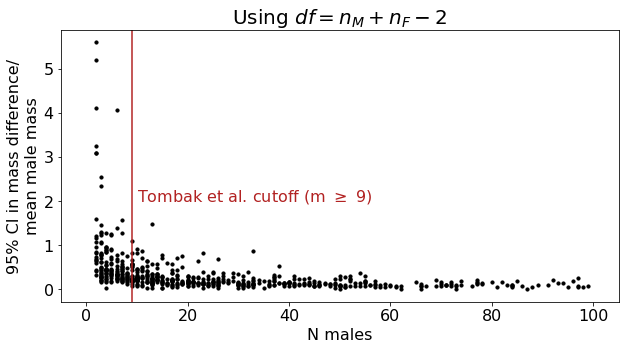

In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()

data_df_slice = data_df[data_df['n_M'] <= 100]
ax.scatter(data_df_slice['n_M'], data_df_slice['95CI_width']/data_df_slice['massM'], s=10, color='k')
ax.set_xlim([-5,105])
ax.axvline(9, color='firebrick')
ax.text(s='Tombak et al. cutoff (m $\geq$ 9)', x = 10, y= 2, color='firebrick', fontsize=16)
ax.set_ylabel('95% CI in mass difference/\nmean male mass', fontsize=16)
ax.set_xlabel('N males', fontsize=16)
ax.tick_params(labelsize=16)
ax.set_title('Using $df = n_M + n_F - 2$', fontsize=20)
fig.savefig('../img/nm_plus_nf_minus_2.png', dpi=200, bbox_inches='tight')

Combine

In [11]:
data_df['massdiffmoe_df1'] = scipy.stats.t.ppf(q=0.975, df=data_df['n_M'] + data_df['n_F'] - 1)*np.sqrt((data_df['pooledVar']/data_df['n_M']) + (data_df['pooledVar']/data_df['n_F']))
data_df['massdiffmoe_df2'] = scipy.stats.t.ppf(q=0.975, df=data_df['n_M'] + data_df['n_F'] - 2)*np.sqrt((data_df['pooledVar']/data_df['n_M']) + (data_df['pooledVar']/data_df['n_F']))

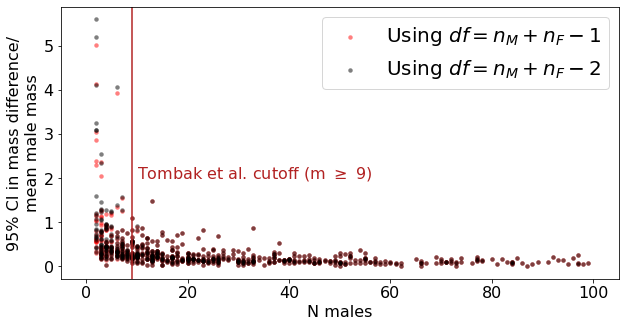

In [12]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()

data_df_slice = data_df[data_df['n_M'] <= 100]
ax.scatter(data_df_slice['n_M'], 2*data_df_slice['massdiffmoe_df1']/data_df_slice['massM'], 
           s=20, color='r', alpha=0.5, linewidth=0, label='Using $df = n_M + n_F - 1$')
ax.scatter(data_df_slice['n_M'], 2*data_df_slice['massdiffmoe_df2']/data_df_slice['massM'], 
           s=20, color='k', alpha=0.5, linewidth=0, label='Using $df = n_M + n_F - 2$')
ax.set_xlim([-5,105])
ax.legend(fontsize=20)
ax.axvline(9, color='firebrick')
ax.text(s='Tombak et al. cutoff (m $\geq$ 9)', x = 10, y= 2, color='firebrick', fontsize=16)
ax.set_ylabel('95% CI in mass difference/\nmean male mass', fontsize=16)
ax.set_xlabel('N males', fontsize=16)
ax.tick_params(labelsize=16)
#ax.set_title('Using $df = n_M + n_F - 2$', fontsize=20)
fig.savefig('../img/combined_dfs.png', dpi=200, bbox_inches='tight')

This error causes the width of 95%CIs to be underestimated, especially for species with low sample size. Does this affect assignment of monomorphism vs dimorphism?

In [19]:
data_df['dimorphic_df1'] = (np.abs(data_df['diffMF']) - data_df['massdiffmoe_df1']) > 0
data_df['dimorphic_df2'] = (np.abs(data_df['diffMF']) - data_df['massdiffmoe_df2']) > 0

In [29]:
data_df['male_bias'] = data_df['diffMF'] > 0

In [26]:
data_df[data_df['dimorphic_df1'] != data_df['dimorphic_df2']]\
[['Species', 'Scientific_Name', 'dimorphic_df1', 'dimorphic_df2', 'n_M', 'n_F']]

,Species,Scientific_Name,dimorphic_df1,dimorphic_df2,n_M,n_F
137,Gnome fruit-eating bat,Artibeus gnomus,True,False,3,3
313,Common brushtail possum,Trichosurus vulpecula fuliginosus,True,False,2,4
407,Tana river mangabey,Cercocebus galeritus,True,False,2,2
536,Neacomys spinosus,Neacomys spinosus,True,False,2,3


Yes, but only for a handful of species below the used cutoff threshold of 9.

### Q2: How does varying inclusion threshold for sample size change overall rates of dimorphism?

In [92]:
data_df['combined_n'] = data_df['n_M'] + data_df['n_F']

In [93]:
n_species = []
male_prop = []
female_prop = []
threshes = range(2,101)

for thresh in threshes:
    data_df_slice = data_df[(data_df['n_M'] >= thresh) & (data_df['n_F'] >= thresh)]\
    .sort_values('combined_n').drop_duplicates('Scientific_Name', keep='last')
    male_prop.append(np.mean(data_df_slice['dimorphic_df2'] & data_df_slice['male_bias']))
    female_prop.append(np.mean(data_df_slice['dimorphic_df2'] & ~data_df_slice['male_bias']))
    n_species.append(len(data_df_slice))
    
male_prop = np.array(male_prop)
female_prop = np.array(female_prop)
n_species = np.array(n_species)

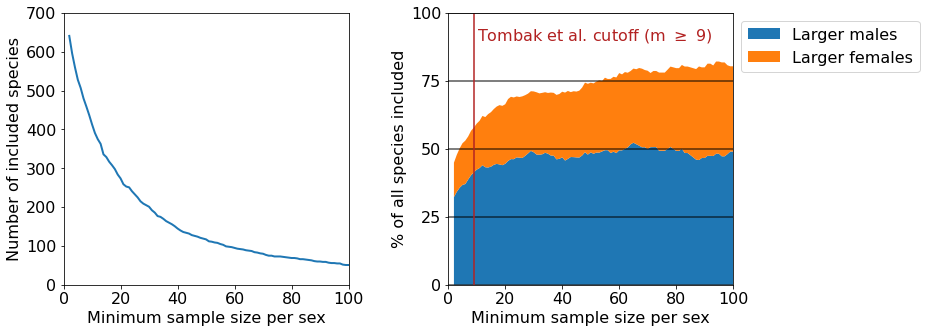

In [94]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(12,5), gridspec_kw={'wspace':0.35})

ax = axes[0]
ax.plot(threshes, n_species, linewidth=2)
ax.set_ylim([0,700])
ax.set_xlim([0,100])
ax.set_xlabel('Minimum sample size per sex', fontsize=16)
ax.set_ylabel('Number of included species', fontsize=16)
ax.tick_params(labelsize=16)

ax = axes[1]
ax.stackplot(threshes, male_prop*100, female_prop*100, labels=['Larger males', 'Larger females'])
ax.set_ylim([0,100])
ax.set_xlim([0,100])
ax.set_xlabel('Minimum sample size per sex', fontsize=16)
ax.set_ylabel('% of all species included', fontsize=16)
ax.tick_params(labelsize=16)
ax.axvline(9, color='firebrick')
ax.set_yticks([0,25,50,75,100])
ax.legend(fontsize=16, bbox_to_anchor=(1,1), loc='upper left')
ax.grid(axis='y', color='k', zorder=-10, alpha=0.5, linewidth=2)
ax.text(s='Tombak et al. cutoff (m $\geq$ 9)', x = 10, y= 90, color='firebrick', fontsize=16)
fig.savefig('../img/sensitivity.png', dpi=200, bbox_inches='tight')